## Analyzing Returns

### Load Libraries and Data

In [50]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import edhc_risk_kit as erk
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


d:\Github repositories\Programming-Study\Investment Management with Python and Machine Learning\Introduction to Portfolio Construction and Analysis with Python\week1\edhc_risk_kit.py:37: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if filetype is "returns":
d:\Github repositories\Programming-Study\Investment Management with Python and Machine Learning\Introduction to Portfolio Construction and Analysis with Python\week1\edhc_risk_kit.py:40: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "nfirms":
d:\Github repositories\Programming-Study\Investment Management with Python and Machine Learning\Introduction to Portfolio Construction and Analysis with Python\week1\edhc_risk_kit.py:43: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "size":


In [51]:
df = pd.read_csv('Portfolios_Formed_on_ME_monthly_EW.csv',
                  index_col=0, na_values=-99.99)
df.index = pd.to_datetime(df.index, format='%Y%m').to_period('M')
df.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
1926-07,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
1926-08,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
1926-09,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
1926-10,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
1926-11,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


Recall that the return from time $t$ to time ${t+1}$ is given by:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

### Analysis of the top quintiles from investments in a portfolio.

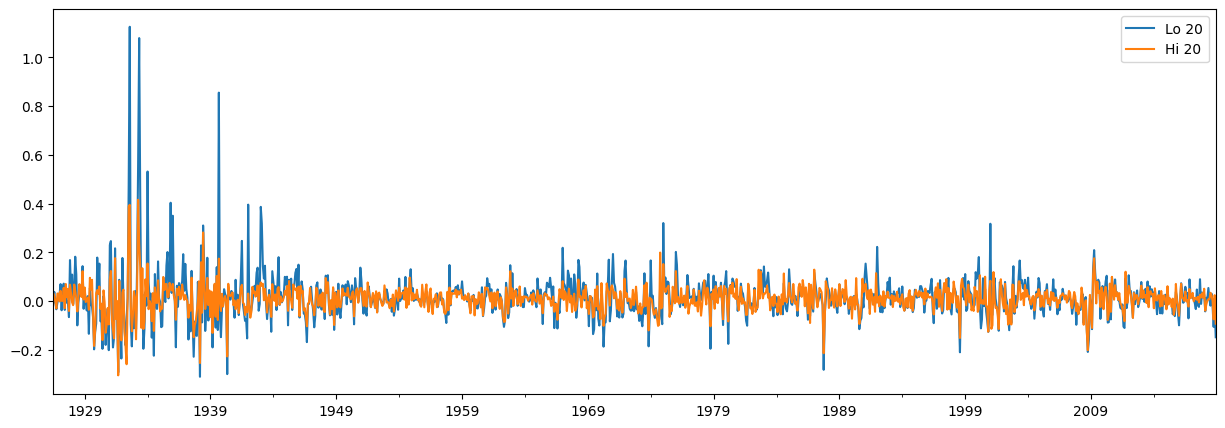

In [52]:
returns = df[['Lo 20', 'Hi 20']] / 100
#returns.columns = ['Small Caps', 'Large Caps']
returns.plot.line(figsize=(15,5));

**What was the Annualized Return of the `Lo 20` and `Hi 20` portfolios over the entire period?**

In [53]:
print(erk.annualize_rets(returns, 12))

Lo 20    0.151977
Hi 20    0.098490
dtype: float64


**What was the Annualized Volatility of the `Lo 20` and `Hi 20` portfolios over the entire period?**

In [54]:
print(erk.annualize_vol(returns, 12))

Lo 20    0.336701
Hi 20    0.195116
dtype: float64


**What was the Annualized Return of the `Lo 20` and `Hi 20` portfolios over the period 1999 - 2015 (both inclusive)?**

In [55]:
print(erk.annualize_rets(returns['1999':'2015'], 12))

Lo 20    0.114426
Hi 20    0.062865
dtype: float64


**What was the Annualized Volatility of the `Lo 20` and `Hi 20` portfolios over the period 1999 - 2015 (both inclusive)?**

In [56]:
print(erk.annualize_vol(returns['1999':'2015'], 12))

Lo 20    0.228894
Hi 20    0.172713
dtype: float64


**What was the Maximum Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the `Lo 20` and `Hi 20` portfolios?**

In [57]:
res_lo20 = erk.drawdown(returns['1999':'2015']['Lo 20'])['Drawdown'].min()
print('Maximum drawdown of Lo 20:', (-res_lo20 * 100).round(2))

Maximum drawdown of Lo 20: 62.48


In [58]:
erk.drawdown(returns['1999':'2015']['Lo 20'])['Drawdown'].idxmin()

Period('2009-02', 'M')

In [59]:
res_hi20 = erk.drawdown(returns['1999':'2015']['Hi 20'])['Drawdown'].min()
print('Maximum drawdown of Hi 20:', (-res_hi20 * 100).round(2))

Maximum drawdown of Hi 20: 55.27


In [60]:
erk.drawdown(returns['1999':'2015']['Hi 20'])['Drawdown'].idxmin()

Period('2009-02', 'M')

In [61]:
hfi = erk.get_hfi_returns() # Get hedge fund indices
hfi.head()

d:\Github repositories\Programming-Study\Investment Management with Python and Machine Learning\Introduction to Portfolio Construction and Analysis with Python\week1\edhc_risk_kit.py:23: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv("data/edhec-hedgefundindices.csv",


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


**What is the skewness of the indices?**

In [62]:
print(erk.skew_kurt(hfi['2009':], 'skew').sort_values())

AttributeError: module 'edhc_risk_kit' has no attribute 'skew_kurt'

**What is the kurtosis of the indices?**

In [ ]:
print(erk.skew_kurt(hfi['2009':], 'kurt').sort_values())

CTA Global                2.591087
Merger Arbitrage          2.715238
Global Macro              3.164362
Distressed Securities     3.319725
Event Driven              3.620617
Funds Of Funds            3.816132
Long/Short Equity         4.115713
Short Selling             4.175832
Emerging Markets          4.401636
Relative Value            4.512482
Equity Market Neutral     5.071677
Fixed Income Arbitrage    6.406941
Convertible Arbitrage     6.775731
dtype: float64


## Downside Measures

### Semideviation

Semideviation is an alternative measurement to standard deviation or variance. However, unlike those measures, semideviation looks only at negative price fluctuations. Thus, semideviation is most often used to evaluate the downside risk of an investment.

**What is the semideviation of the indices?**

In [ ]:
print(erk.semideviation(hfi['2009':]).sort_values())

Fixed Income Arbitrage    0.003321
Merger Arbitrage          0.003611
Global Macro              0.005075
Equity Market Neutral     0.005186
Relative Value            0.005711
Convertible Arbitrage     0.006681
Funds Of Funds            0.007948
Distressed Securities     0.009498
Event Driven              0.010135
CTA Global                0.010996
Long/Short Equity         0.012139
Emerging Markets          0.015276
Short Selling             0.021240
dtype: float64


### Value at Risk (VaR) and Conditional Value at Risk (CVaR)

Value at risk (VaR) is a statistic that measures and quantifies the level of financial risk within a firm, portfolio or position over a specific time frame. This metric is most commonly used by investment and commercial banks to determine the extent and occurrence ratio of potential losses in their institutional portfolios. Risk managers use VaR to measure and control the level of risk exposure. One can apply VaR calculations to specific positions or whole portfolios or to measure firm-wide risk exposure.  

Conditional Value at Risk (CVaR), also known as the expected shortfall, is a risk assessment measure that quantifies the amount of tail risk an investment portfolio has. CVaR is derived by taking a weighted average of the “extreme” losses in the tail of the distribution of possible returns, beyond the value at risk (VaR) cutoff point. Conditional value at risk is used in portfolio optimization for effective risk management.

### Historic VaR

The historical method simply re-organizes actual historical returns, putting them in order from worst to best. It then assumes that history will repeat itself, from a risk perspective. The code below shows that for the first index, Convertible Arbitrage, there is a 5% chance you might lose approximately 1.5%, or worse, in any given month.

In [ ]:
erk.var_historic(hfi, level=5)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

### Parametric VaR

The parametric method looks at the price movements of investments over a look-back period and uses probability theory to compute a portfolio's maximum loss. The variance-covariance method for the value at risk calculates the standard deviation of price movements of an investment or security. Assuming stock price returns and volatility follow a normal distribution, the maximum loss within the specified confidence level is calculated.

In [ ]:
erk.var_gaussian(hfi, level=5)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

### Cornish-Fisher

The Cornish–Fisher expansion is an asymptotic expansion used to approximate the quantiles of a probability distribution based on its cumulants.

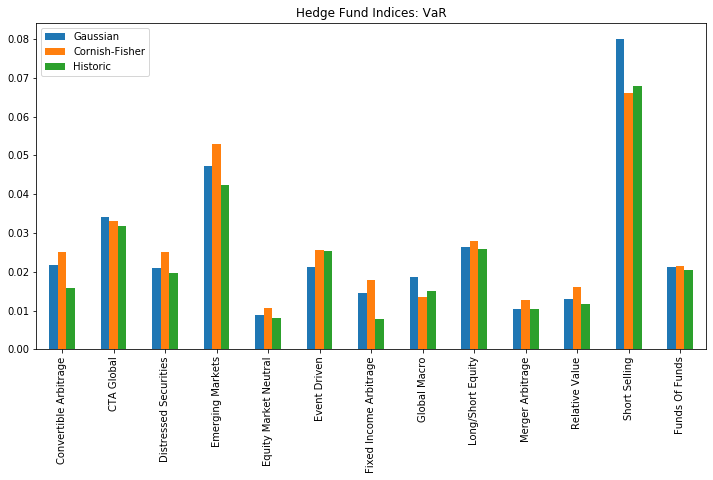

In [ ]:
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified=True), erk.var_historic(hfi)]
comparison = pd.concat(var_list, axis=1)
comparison.columns = ['Gaussian', 'Cornish-Fisher', 'Historic']
comparison.plot.bar(title='Hedge Fund Indices: VaR', figsize=(12,6));

### Conditional VaR

Safer investments like large-cap U.S. stocks or investment-grade bonds rarely exceed VaR by a significant amount. More volatile asset classes, like small-cap U.S. stocks, emerging markets stocks or derivatives, can exhibit CVaRs many times greater than VaRs. Ideally, investors are looking for small CVaRs. However, investments with the most upside potential often have large CVaRs.

In [ ]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64